<strong>  Majority Class:</strong> More than half of the examples belong to this class. Ex: Normal cases(-ve case) <br>
<strong>  Minority Class:</strong> Less than half of the examples belong to this class. Ex: Abnormal cases (+ve case) <br>
<br>
Slight Imbalance: 4:6<br>
Severe Imbalance: 1:100<br>
<br>
<br>
Examples:
- Fraud Detection
- Intrusion Detection




The make_classification() scikit-learn function can be used to define a synthetic dataset with a desired class imbalance. The “weights” argument specifies the ratio of examples in the negative class, e.g. [0.99, 0.01] means that 99 percent of the examples will belong to the majority class, and the remaining 1 percent will belong to the minority class.

Counter({0: 900, 1: 100})


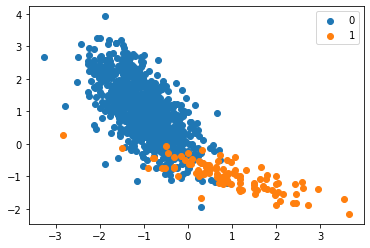

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from collections import Counter
#define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90, 0.10], flip_y=0)
#summerize class distribution
counter = Counter(y)
print(counter)
#scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()


# Evaluating an Imbalanced dataset

Prediction accuracy is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.<br><br>
Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives.

     Precision = TruePositives / (TruePositives + FalsePositives)
<br>
Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives.

     Recall = TruePositives / (TruePositives + FalseNegatives)
<br>
The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time.

     F1-Score = (2 * Precision * Recall) / (Precision + Recall)


In [2]:
#Basic model 1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)
model1 = LogisticRegression()
model1.fit(train_X, train_y)
y_pred = model1.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

accuracy score:  0.9566666666666667
Precision score:  0.84
Recall Score:  0.7
F1 Score:  0.7636363636363636
Confusion Matrix: 
 [[266   4]
 [  9  21]]


##   Undersampling the majority class

- A possible downside is that examples from the majority class that are helpful during modeling may be deleted.

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy =0.5)
x_under, y_under = undersampler.fit_resample(X, y)
print(Counter(y_under))

# model 2
train_X, test_X, train_y, test_y = train_test_split(x_under, y_under, test_size=0.3, stratify=y_under)
model2 = LogisticRegression()
model2.fit(train_X, train_y)
y_pred = model2.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

Counter({0: 200, 1: 100})
accuracy score:  0.8777777777777778
Precision score:  0.7878787878787878
Recall Score:  0.8666666666666667
F1 Score:  0.8253968253968254
Confusion Matrix: 
 [[53  7]
 [ 4 26]]


# Oversampling the minority class

Duplicating examples in the minority class do not add any new information. Instead, new examples from the minority can be synthesized using existing examples in the training dataset. These new examples will be “close” to existing examples in the feature space, but different in small but random ways.<br>

The <strong>SMOTE</strong> algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

In [5]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))
# model 3
train_X, test_X, train_y, test_y = train_test_split(x_over, y_over, test_size=0.3, stratify=y_over)
model3 = LogisticRegression()
model3.fit(train_X, train_y)
y_pred = model3.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

Counter({0: 900, 1: 450})
accuracy score:  0.9555555555555556
Precision score:  0.9398496240601504
Recall Score:  0.9259259259259259
F1 Score:  0.9328358208955223
Confusion Matrix: 
 [[262   8]
 [ 10 125]]


In [6]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=0.5)
x_rover, y_rover = oversampler.fit_resample(X,y)
print(Counter(y_over))
# model 4
train_X, test_X, train_y, test_y = train_test_split(x_rover, y_rover, test_size=0.3, stratify=y_rover)
model4 = LogisticRegression()
model4.fit(train_X, train_y)
y_pred = model4.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

Counter({0: 900, 1: 450})
accuracy score:  0.9012345679012346
Precision score:  0.8275862068965517
Recall Score:  0.8888888888888888
F1 Score:  0.8571428571428572
Confusion Matrix: 
 [[245  25]
 [ 15 120]]


# Combining data undersampling and oversampling

Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset. <br><br>
Example below uses the <strong>SMOTEENN</strong> that combines both <strong>SMOTE</strong> oversampling of the minority class and <strong>Edited Nearest Neighbor</strong>s undersampling of the majority class.

In [7]:
from imblearn.combine import SMOTEENN
combine = SMOTEENN(sampling_strategy=0.5)
x_c, y_c = combine.fit_resample(X,y)
print(Counter(y_c))
#model 5
train_X, test_X, train_y, test_y = train_test_split(x_c, y_c, test_size=0.3, stratify=y_c)
model5 = LogisticRegression(random_state=0)
model5.fit(train_X, train_y)
y_pred = model5.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

Counter({0: 820, 1: 369})
accuracy score:  0.9775910364145658
Precision score:  0.9813084112149533
Recall Score:  0.9459459459459459
F1 Score:  0.963302752293578
Confusion Matrix: 
 [[244   2]
 [  6 105]]


In [8]:
#manually try to combine both undersampling and oversampling techniques
#apply random undersampling with random oversampler
x_ou, y_ou = undersampler.fit_resample(x_rover,y_rover) 
print(Counter(y_ou))
#model 6
train_X, test_X, train_y, test_y = train_test_split(x_ou, y_ou, test_size=0.3, stratify=y_ou)
model6 = LogisticRegression(random_state=0)
model6.fit(train_X, train_y)
y_pred = model6.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

Counter({0: 900, 1: 450})
accuracy score:  0.9061728395061729
Precision score:  0.8540145985401459
Recall Score:  0.8666666666666667
F1 Score:  0.8602941176470588
Confusion Matrix: 
 [[250  20]
 [ 18 117]]


# Cost sensitive algorithms

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. Many machine learning algorithms can be updated to be cost-sensitive, where the model is penalized for misclassification errors from one class more than the other, such as the minority class.
<br><br>
The scikit-learn library provides this capability for a range of algorithms via the class_weight attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.
<br><br>
If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the class_weight argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.
<br><br>
This is a useful heuristic and can be configured automatically by setting the class_weight argument to the string ‘balanced‘.

In [9]:
#cost sensitive logistic regression with original data X, y
#model 7
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)
model7 = LogisticRegression(class_weight='balanced')
model7.fit(train_X, train_y)
y_pred = model7.predict(test_X)

print("accuracy score: ", accuracy_score(test_y, y_pred))
print("Precision score: ", precision_score(test_y, y_pred))
print("Recall Score: ", recall_score(test_y, y_pred))
print("F1 Score: ", f1_score(test_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred))

accuracy score:  0.9366666666666666
Precision score:  0.6170212765957447
Recall Score:  0.9666666666666667
F1 Score:  0.7532467532467533
Confusion Matrix: 
 [[252  18]
 [  1  29]]
